<a href="https://colab.research.google.com/github/jayadir/EMNIST-dataset-classification-using-Neural-Network/blob/main/EMNIST_dataset_classification_using_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification of EMNIST/Balanced dataset using Feed forward neural network

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

load emnist/balanced dataset


In [3]:
data = tfds.data_source('emnist/balanced', split=['train', 'test'])


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/112800 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/balanced/incomplete.VM1KOQ_3.1.0/emnist-train.array_record*...:   0…

Generating test examples...:   0%|          | 0/18800 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/balanced/incomplete.VM1KOQ_3.1.0/emnist-test.array_record*...:   0%…

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/balanced/3.1.0. Subsequent calls will reuse this data.


In [4]:
train_data = data[0]
test_data = data[1]

In [5]:
train_data=list(train_data)

In [6]:
test_data=list(test_data)
test_data=np.array(test_data)
train_data=np.array(train_data)

In [120]:
train_images = np.array([sample['image'] for sample in train_data])
train_labels = np.array([sample['label'] for sample in train_data])
test_images = np.array([sample['image'] for sample in test_data])
test_labels = np.array([sample['label'] for sample in test_data])

In [121]:
train_images.shape

(112800, 28, 28, 1)

In [122]:
from sklearn.model_selection import train_test_split
def split_data(train_data, train_labels, validation_size):
    train_images, validation_images, train_labels, validation_labels = train_test_split(train_data, train_labels, test_size=validation_size, random_state=42,shuffle=True)
    return train_images, validation_images, train_labels, validation_labels

In [123]:
train_images, validation_images, train_labels, validation_labels = split_data(train_images, train_labels, 0.1)

we need to flatten the data so that it can be passed to the feed forward neural network

In [124]:
train_images = train_images.reshape(train_images.shape[0], 28*28)
test_images = test_images.reshape(test_images.shape[0], 28*28)
validation_images = validation_images.reshape(validation_images.shape[0], 28*28)


In [125]:
train_images.shape

(101520, 784)

In [126]:
print(train_images.shape)
print(validation_images.shape)
print(train_labels.shape)
print(validation_labels.shape)

(101520, 784)
(11280, 784)
(101520,)
(11280,)


we need to normalise the data for better learning

In [127]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
validation_images = validation_images.astype('float32') / 255

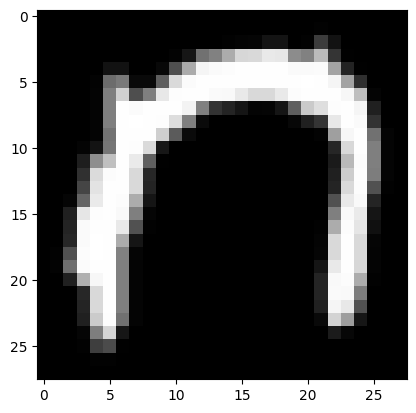

In [128]:
def flip_and_rotate(image):
    W = 28
    H = 28
    image = image.reshape(W, H)
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

plt.imshow(flip_and_rotate(train_images[4324]), cmap=plt.cm.gray)
plt.show()

In [177]:
train_images_forplot = np.array([flip_and_rotate(image) for image in train_images])


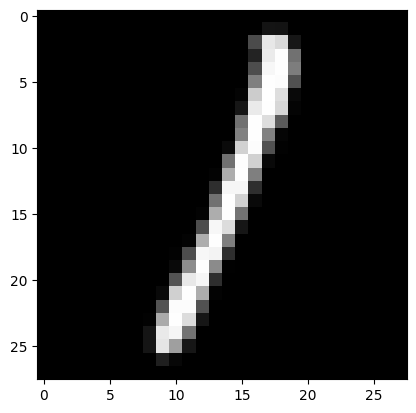

21


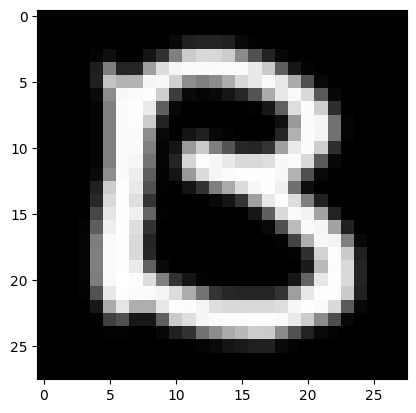

11


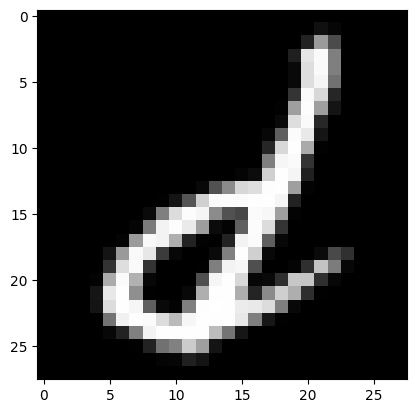

38


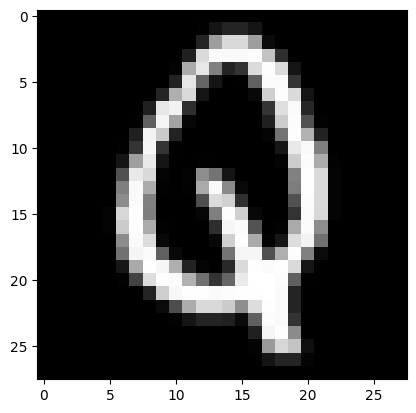

26


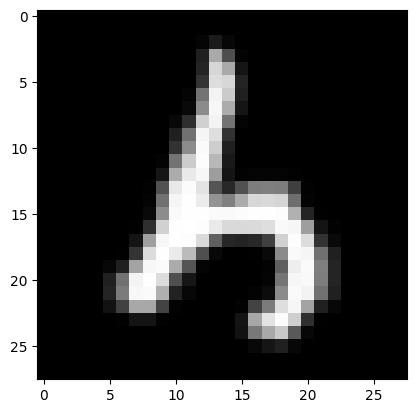

42


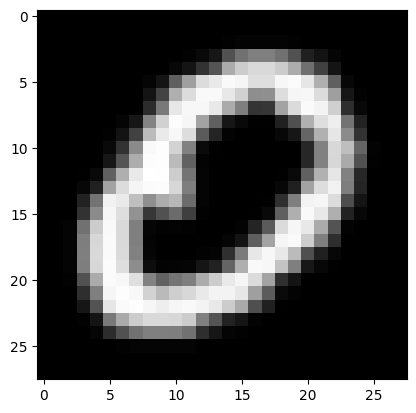

24


In [178]:
for i in range(3,9):
  plt.imshow(train_images_forplot[i], cmap=plt.cm.gray)
  plt.show()
  print(train_labels[i])

In [131]:
# train_images = train_images.reshape(train_images.shape[0], 28*28)
# test_images = test_images.reshape(test_images.shape[0], 28*28)
# validation_images = validation_images.reshape(validation_images.shape[0], 28*28)
# print(train_images.shape)
# print(validation_images.shape)
# print(train_labels.shape)
# print(validation_labels.shape)

In [132]:
dataset_info = tfds.builder('emnist/balanced').info
label_mapping = dataset_info.features['label'].int2str
label_mapping(5)

'5'

In [133]:
len(set(train_labels))

47

In [134]:
from tensorflow.keras import layers, regularizers, initializers
def build_model(input_size, num_hidden_layers, hidden_size, weight_decay, activation, initializer):
  model = tf.keras.Sequential()
  model.add(layers.Input(shape=(input_size,)))
  if initializer=="xavier":
    initializer = initializers.GlorotUniform()
  else:
    innitializer = initializers.RandomNormal()
  for i in range(num_hidden_layers):
    model.add(layers.Dense(hidden_size[i], activation=activation, kernel_regularizer=regularizers.l2(weight_decay), kernel_initializer=initializer))
  model.add(layers.Dense(47, activation='softmax'))
  return model




In [135]:
model = build_model(
    input_size=784,
    num_hidden_layers=3,
    hidden_size=[128,128,128],
    weight_decay=0.0005,
    activation='relu',
    initializer='xavier'
)

In [136]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_43 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 47)                  │           6,063 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 139,567 (545.18 KB)

 Trainable params: 139,567 (545.18 KB)

 Non-trainable params: 0 (0.00 B)

In [137]:
def train_model(model, train_images, train_labels, val_images, val_labels, optimizer, batch_size, epochs, learning_rate=0.001):
    # tf.keras.backend.clear_session()

    optimizers = {
        "sgd": tf.keras.optimizers.SGD(learning_rate),
        "adam": tf.keras.optimizers.Adam(learning_rate),
        "rmsprop": tf.keras.optimizers.RMSprop(learning_rate),
        "momentum": tf.keras.optimizers.SGD(learning_rate, momentum=0.9),
        "nesterov": tf.keras.optimizers.SGD(learning_rate, momentum=0.9, nesterov=True),
        "nadam": tf.keras.optimizers.Nadam(learning_rate)
    }
    if optimizer not in optimizers:
        raise ValueError(f"Unknown optimizer: {optimizer}")
    optimizer_instance = optimizers[optimizer]

    model.compile(optimizer=optimizer_instance, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(train_images,train_labels, epochs=epochs, validation_data=(val_images,val_labels))
    return history


In [138]:
def evaluate_model(model, test_images,test_labels):
    loss, accuracy = model.evaluate(test_images,test_labels)
    print(f"Test Accuracy: {accuracy * 100:.2f}%")
    return accuracy

In [140]:
num_hidden_layers = 3
hidden_size = [64,64,64]
weight_decay = 0.0005
learning_rate = 1e-3
optimizer_name = "adam"
epochs = 10
activation = "relu"
initializer = "xavier"

In [165]:
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(15, 15))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()


In [141]:
model=build_model(input_size=784, num_hidden_layers=num_hidden_layers, hidden_size=hidden_size, weight_decay=weight_decay, activation=activation, initializer=initializer)


In [142]:
history=train_model(model, train_images,train_labels, validation_images, validation_labels, optimizer=optimizer_name, batch_size=128, epochs=epochs, learning_rate=learning_rate)

Epoch 1/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.5406 - loss: 1.7893 - val_accuracy: 0.7484 - val_loss: 0.9650
Epoch 2/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7593 - loss: 0.9230 - val_accuracy: 0.7771 - val_loss: 0.8575
Epoch 3/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.7851 - loss: 0.8277 - val_accuracy: 0.7750 - val_loss: 0.8431
Epoch 4/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7984 - loss: 0.7808 - val_accuracy: 0.7996 - val_loss: 0.7698
Epoch 5/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8057 - loss: 0.7410 - val_accuracy: 0.7985 - val_loss: 0.7631
Epoch 6/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8149 - loss: 0.7137 - val_accuracy: 0.8074 - val_loss: 0.7353
Epoch 7/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8193 - loss: 0.6963 - val_accuracy: 0.8055 - val_loss: 0.7322
Epoch 8/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8236 - loss: 0

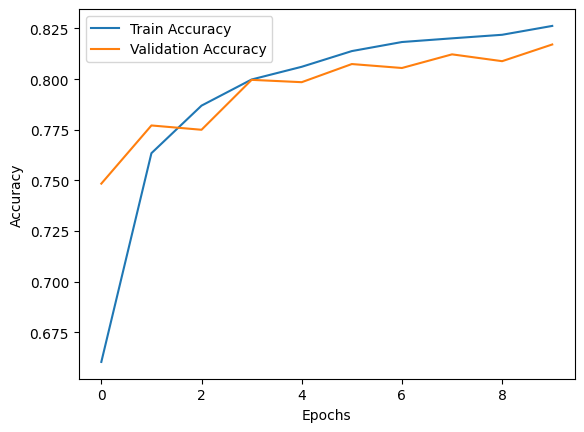

In [143]:
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [145]:
evaluate_model(model,test_images,test_labels)

588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8119 - loss: 0.7237
Test Accuracy: 81.38%


0.813829779624939

In [146]:
num_hidden_layers = 4
hidden_size = [64,64,64,64]
weight_decay = 0.0005
learning_rate = 1e-3
optimizer_name = "adam"
epochs = 10
activation = "relu"
initializer = "xavier"

In [147]:
model2=build_model(input_size=784, num_hidden_layers=num_hidden_layers, hidden_size=hidden_size, weight_decay=weight_decay, activation=activation, initializer=initializer)


In [148]:
history2=train_model(model2, train_images,train_labels, validation_images, validation_labels, optimizer=optimizer_name, batch_size=128, epochs=epochs, learning_rate=learning_rate)

Epoch 1/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.5375 - loss: 1.7930 - val_accuracy: 0.7452 - val_loss: 0.9980
Epoch 2/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.7509 - loss: 0.9544 - val_accuracy: 0.7663 - val_loss: 0.8931
Epoch 3/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7772 - loss: 0.8585 - val_accuracy: 0.7823 - val_loss: 0.8505
Epoch 4/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.7913 - loss: 0.8060 - val_accuracy: 0.7864 - val_loss: 0.8338
Epoch 5/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8039 - loss: 0.7747 - val_accuracy: 0.7957 - val_loss: 0.7894
Epoch 6/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8088 - loss: 0.7436 - val_accuracy: 0.8083 - val_loss: 0.7471
Epoch 7/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.8144 - loss: 0.7279 - val_accuracy: 0.8021 - val_loss: 0.7669
Epoch 8/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8184 - loss: 0

In [152]:
evaluate_model(model2,test_images,test_labels)

588/588 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8043 - loss: 0.7726
Test Accuracy: 80.38%


0.8037766218185425

In [157]:
num_hidden_layers = 4
hidden_sizes = [512, 256, 128, 64]
weight_decay = 0.0001
learning_rate = 1e-4
optimizer_name = "adam"
epochs = 10
activation = "relu"
initializer = "xavier"

In [158]:
model3=build_model(input_size=784, num_hidden_layers=num_hidden_layers, hidden_size=hidden_size, weight_decay=weight_decay, activation=activation, initializer=initializer)


In [159]:
history3=train_model(model3, train_images,train_labels, validation_images, validation_labels, optimizer=optimizer_name, batch_size=128, epochs=epochs, learning_rate=learning_rate)

Epoch 1/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.3539 - loss: 2.5364 - val_accuracy: 0.6491 - val_loss: 1.2767
Epoch 2/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.6657 - loss: 1.2043 - val_accuracy: 0.7081 - val_loss: 1.0504
Epoch 3/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.7162 - loss: 1.0150 - val_accuracy: 0.7348 - val_loss: 0.9422
Epoch 4/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.7452 - loss: 0.8955 - val_accuracy: 0.7496 - val_loss: 0.8719
Epoch 5/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.7606 - loss: 0.8295 - val_accuracy: 0.7674 - val_loss: 0.8043
Epoch 6/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.7751 - loss: 0.7803 - val_accuracy: 0.7739 - val_loss: 0.7819
Epoch 7/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7899 - loss: 0.7341 - val_accuracy: 0.7818 - val_loss: 0.7481
Epoch 8/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.7951 - loss: 0

In [160]:
evaluate_model(model3,test_images,test_labels)

588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7889 - loss: 0.7265
Test Accuracy: 78.95%


0.7894681096076965

588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


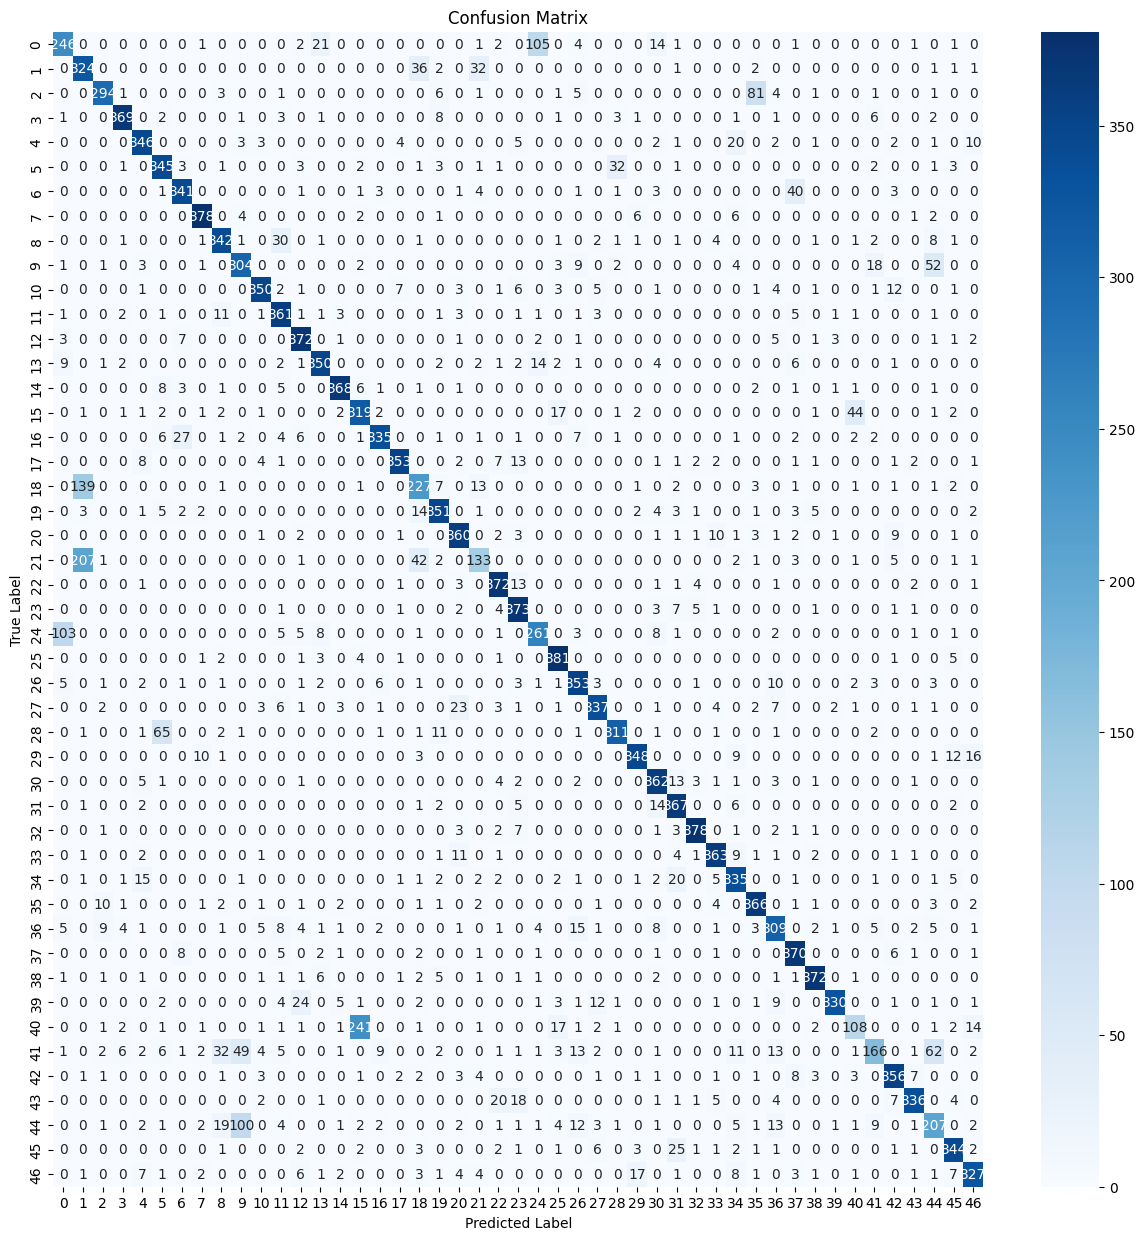

In [166]:

y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_labels
class_names = list(set(train_labels))


plot_confusion_matrix(y_true, y_pred_classes, class_names)


In [168]:
optimizers = ["sgd", "adam", "rmsprop", "momentum", "nesterov", "nadam"]
accuracies = {}

for optimizer in optimizers:
    print(f"Training with optimizer: {optimizer}")
    model3=build_model(input_size=784, num_hidden_layers=num_hidden_layers, hidden_size=hidden_size, weight_decay=weight_decay, activation=activation, initializer=initializer)
    history = train_model(model3, train_images, train_labels, validation_images, validation_labels, optimizer=optimizer, batch_size=128, epochs=10, learning_rate=1e-4)
    accuracy = evaluate_model(model3, test_images, test_labels)
    accuracies[optimizer] = accuracy

Training with optimizer: sgd
Epoch 1/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.0153 - loss: 3.8998 - val_accuracy: 0.0198 - val_loss: 3.8922
Epoch 2/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0190 - loss: 3.8894 - val_accuracy: 0.0236 - val_loss: 3.8841
Epoch 3/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.0234 - loss: 3.8823 - val_accuracy: 0.0285 - val_loss: 3.8767
Epoch 4/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0278 - loss: 3.8749 - val_accuracy: 0.0325 - val_loss: 3.8693
Epoch 5/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0327 - loss: 3.8676 - val_accuracy: 0.0365 - val_loss: 3.8616
Epoch 6/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0382 - loss: 3.8596 - val_accuracy: 0.0432 - val_loss: 3.8533
Epoch 7/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.0437 - loss: 3.8515 - val_accuracy: 0.0467 - val_loss: 3.8439
Epoch 8/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - 

In [169]:
print(accuracies)

{'sgd': 0.06148936226963997, 'adam': 0.7939361929893494, 'rmsprop': 0.7858510613441467, 'momentum': 0.6423404216766357, 'nesterov': 0.6270744800567627, 'nadam': 0.7942553162574768}


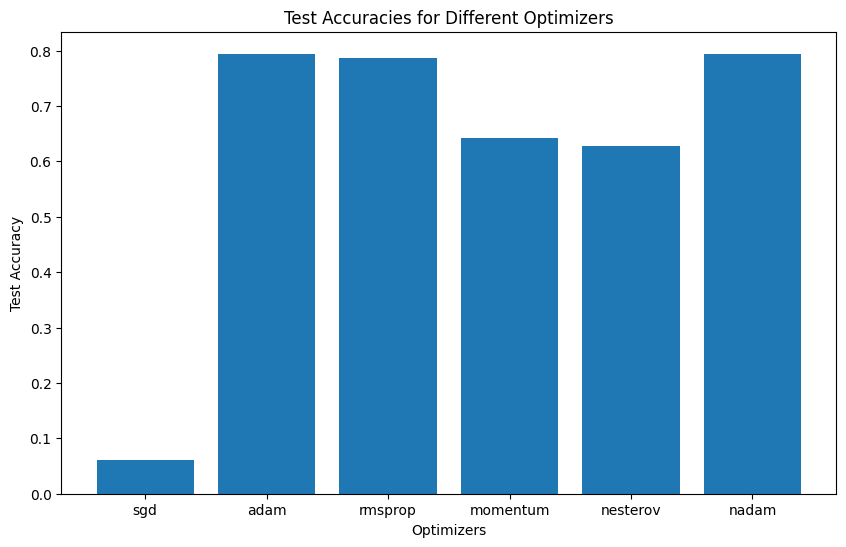

In [170]:
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values())
plt.xlabel("Optimizers")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracies for Different Optimizers")
plt.show()


adam,rmsprop,nadam works performs best and achieve higher accuracies in lower number of epochs resulting in faster convergence

Epoch 1/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.0221 - loss: 0.0342 - val_accuracy: 0.0217 - val_loss: 0.0208
Epoch 2/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.0204 - loss: 0.0208 - val_accuracy: 0.0214 - val_loss: 0.0208
Epoch 3/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.0214 - loss: 0.0208 - val_accuracy: 0.0181 - val_loss: 0.0208
Epoch 4/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.0212 - loss: 0.0208 - val_accuracy: 0.0181 - val_loss: 0.0208
Epoch 5/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.0200 - loss: 0.0208 - val_accuracy: 0.0209 - val_loss: 0.0208
Epoch 6/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.0210 - loss: 0.0208 - val_accuracy: 0.0191 - val_loss: 0.0208
Epoch 7/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.0216 - loss: 0.0208 - val_accuracy: 0.0203 - val_loss: 0.0208
Epoch 8/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.0223 - loss: 0

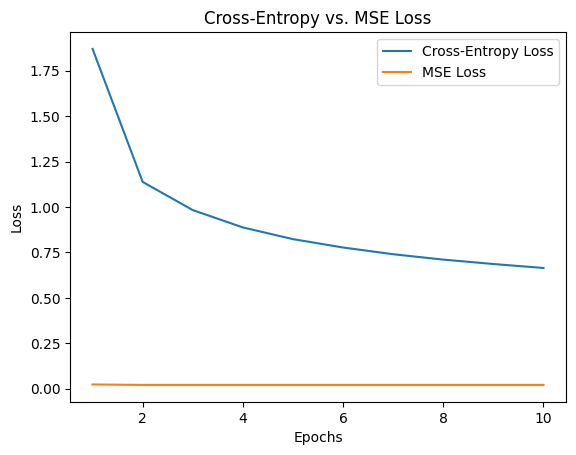

In [171]:
model_mse = build_model(
    input_size=784,
    num_hidden_layers=3,
    hidden_size=[128,128,128],
    weight_decay=0.0005,
    activation='relu',
    initializer='xavier'
)

model_mse.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history_mse = model_mse.fit(train_images, tf.keras.utils.to_categorical(train_labels, num_classes=47),
                            epochs=epochs, validation_data=(validation_images, tf.keras.utils.to_categorical(validation_labels, num_classes=47)))
cross_entropy_losses = history.history['loss']
mse_losses = history_mse.history['loss']
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, cross_entropy_losses, label='Cross-Entropy Loss')
plt.plot(epochs_range, mse_losses, label='MSE Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Cross-Entropy vs. MSE Loss')
plt.legend()
plt.show()


mse loss is not used for classification problems so it performs poor in comparision with cross entropy loss function which is specifically used for classification

In [175]:
#high learning rate
num_hidden_layers = 4
hidden_sizes = [512, 256, 128, 64]
weight_decay = 0.0001
learning_rate = 1e-1
optimizer_name = "adam"
epochs = 10
activation = "relu"
initializer = "xavier"

In [176]:
model4=build_model(input_size=784, num_hidden_layers=num_hidden_layers, hidden_size=hidden_size, weight_decay=weight_decay, activation=activation, initializer=initializer)
history4 = train_model(model4, train_images, train_labels, validation_images, validation_labels, optimizer=optimizer, batch_size=128, epochs=10, learning_rate=1e-4)
accuracy4 = evaluate_model(model4, test_images, test_labels)

Epoch 1/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.3465 - loss: 2.5814 - val_accuracy: 0.6480 - val_loss: 1.2739
Epoch 2/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.6701 - loss: 1.1888 - val_accuracy: 0.7122 - val_loss: 1.0402
Epoch 3/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.7203 - loss: 0.9893 - val_accuracy: 0.7330 - val_loss: 0.9343
Epoch 4/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7459 - loss: 0.8870 - val_accuracy: 0.7521 - val_loss: 0.8602
Epoch 5/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.7658 - loss: 0.8161 - val_accuracy: 0.7697 - val_loss: 0.8142
Epoch 6/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.7780 - loss: 0.7695 - val_accuracy: 0.7777 - val_loss: 0.7722
Epoch 7/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.7859 - loss: 0.7345 - val_accuracy: 0.7799 - val_loss: 0.7525
Epoch 8/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7951 - loss: 0

# **Conclusion**


*   3 parameters that would work the best for any dataset related to mnist would be adam/rmsprop/nadam as an optimiser, higher epochs and cross entropy as loss function and accuracies with these configurations are about ~80% on average


